In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df["TARGET"] = california.target

df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


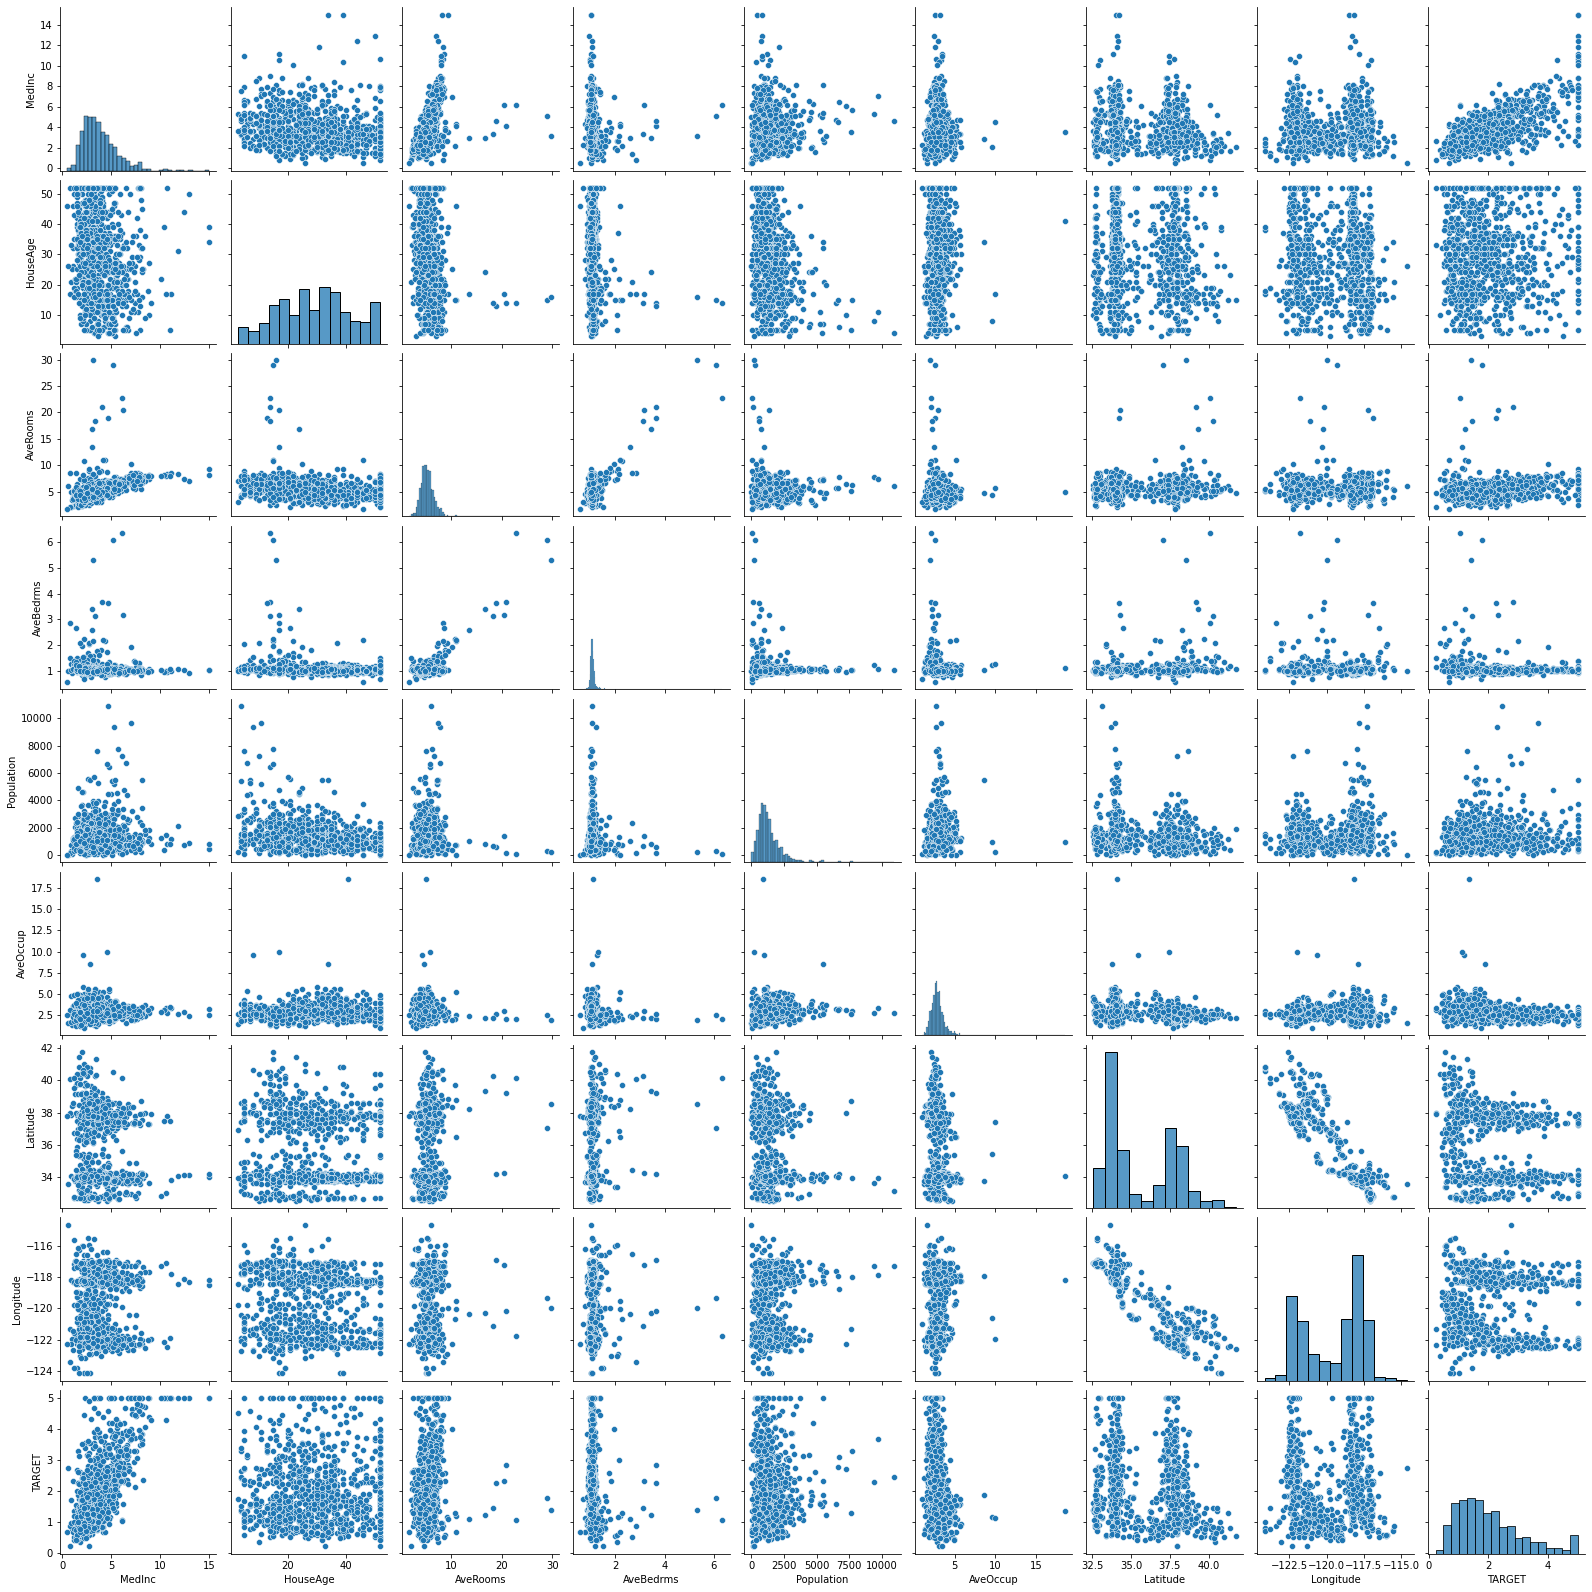

In [4]:
sns.pairplot(df.sample(1000))
plt.show()

In [5]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] = scaler.transform(df.values[:, :-1])

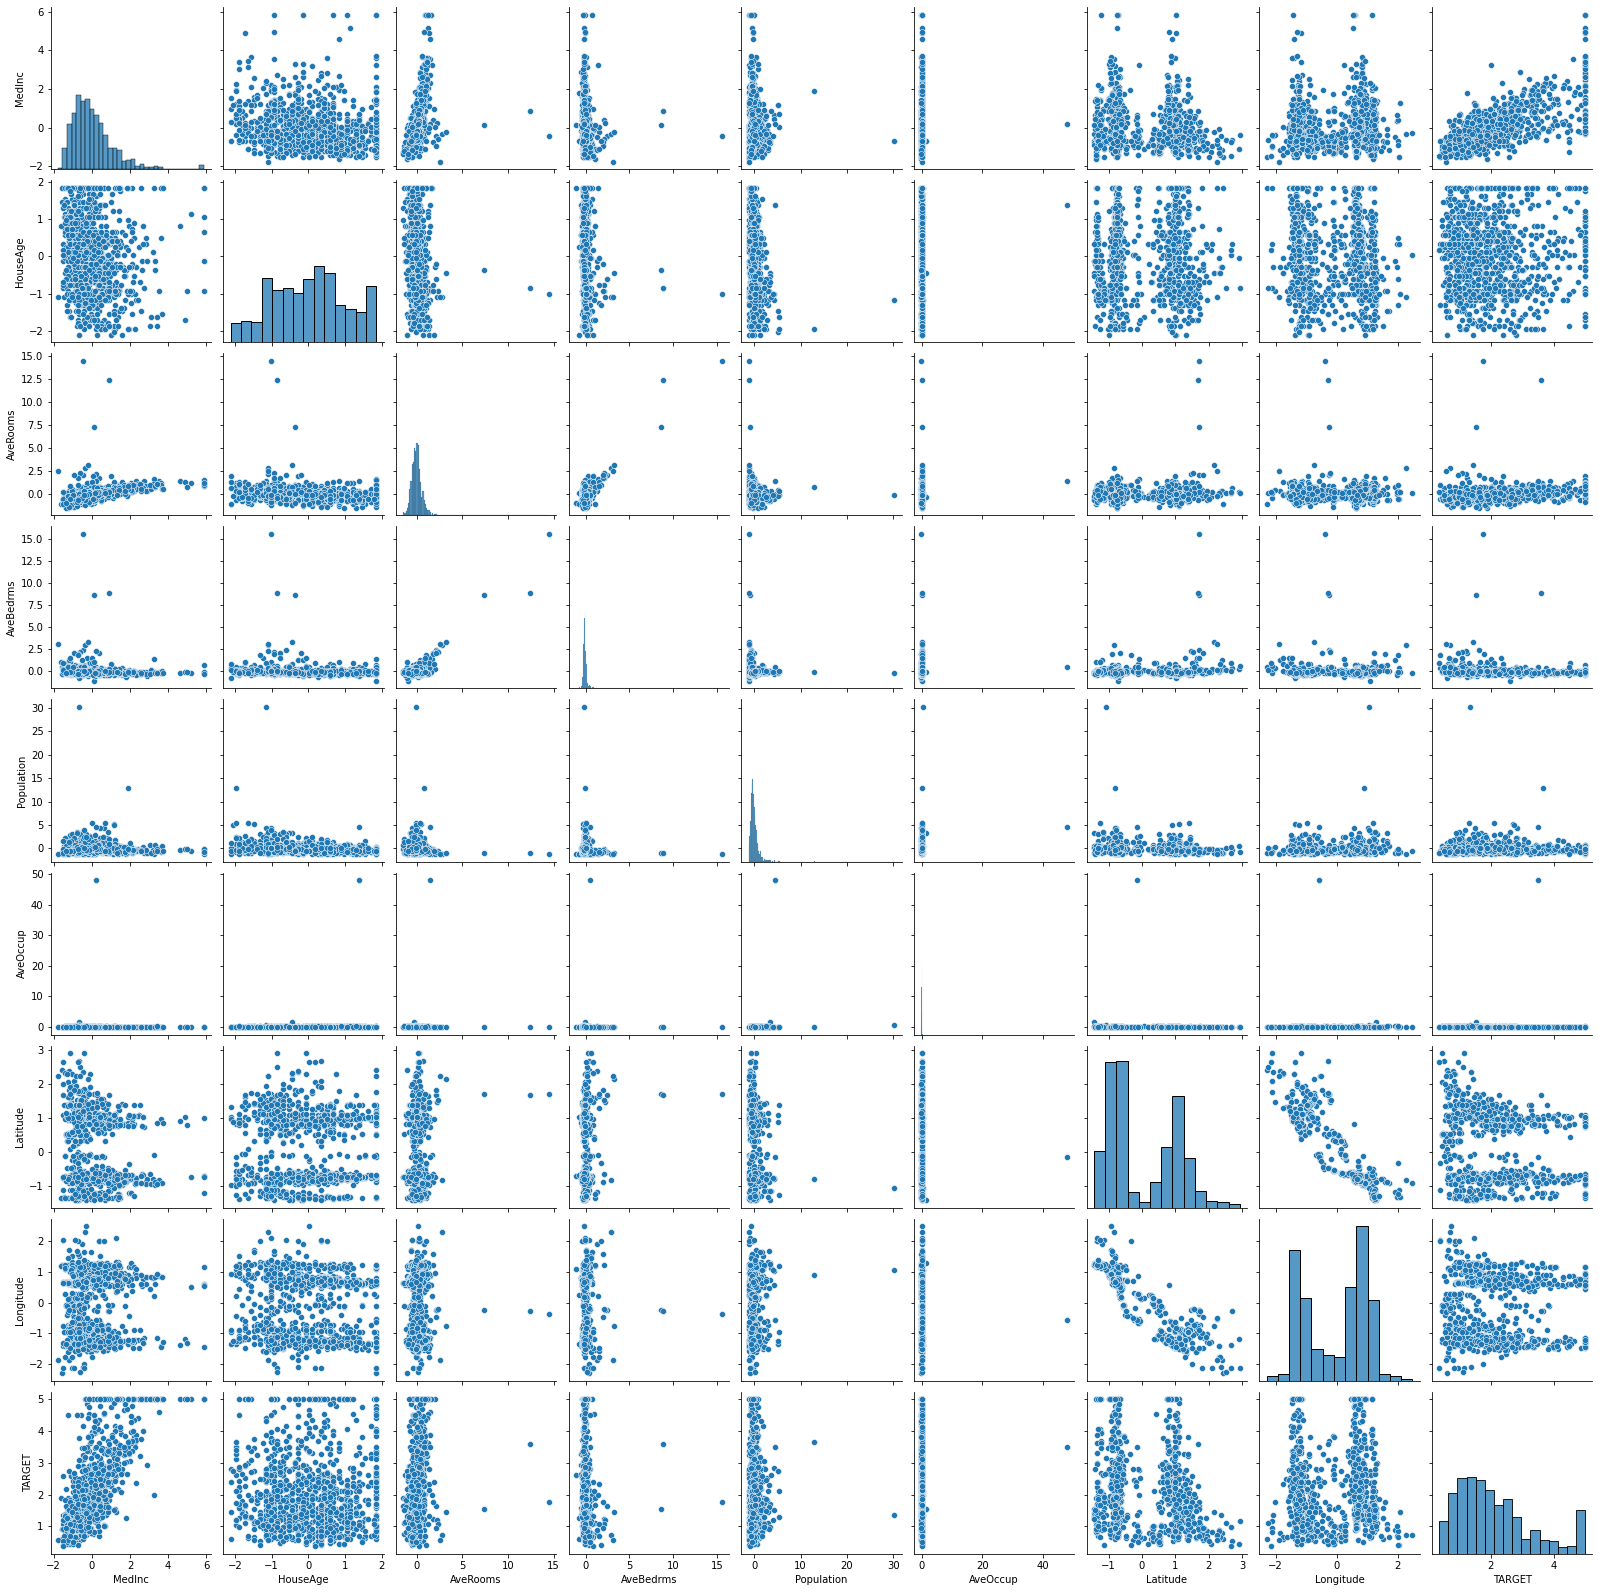

In [6]:
sns.pairplot(df.sample(1000))
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
data = torch.from_numpy(df.values).float()

data.shape

torch.Size([20640, 9])

In [9]:
x = data[:, :-1]
y = data[:, -1:]

x.shape, y.shape

(torch.Size([20640, 8]), torch.Size([20640, 1]))

In [10]:
n_epochs = 4000
batch_size = 256
learning_rate = 1e-2
print_interval = 200

In [11]:
model = nn.Sequential(
    nn.Linear(x.shape[-1], 6),
    nn.LeakyReLU(),
    nn.Linear(6, 5),
    nn.LeakyReLU(),
    nn.Linear(5, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 3),
    nn.LeakyReLU(),
    nn.Linear(3, y.shape[-1])
)

model

Sequential(
  (0): Linear(in_features=8, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
)

In [12]:
optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)

In [15]:
for i in range(n_epochs):
    # index 순서를 shuffle
    indices = torch.randperm(x.shape[0])
    
    # indecs에 존재하는 index로 재정렬
    x_ = torch.index_select(x, dim=0, index=indices)
    y_ = torch.index_select(y, dim=0, index=indices)
    
    # batch_size 갯수만큼 split => 256 * 81 = 20,736 => 256개씩 데이터가 든 81개의 iter 생성
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    
    y_hat = []
    total_loss = 0
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        total_loss += float(loss) # this is important to prevent memory leak
        y_hat += [y_hat_i]
        
    total_loss = total_loss / len(x_)
    
    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, total_loss))
        
# y_hat = torch.cat(y_hat, dim=0)
# y = torch.cat(y_, dim=0)

Epoch 200: loss=1.3287e+00
Epoch 400: loss=1.3278e+00
Epoch 600: loss=1.3277e+00
Epoch 800: loss=1.3262e+00
Epoch 1000: loss=1.3273e+00
Epoch 1200: loss=1.3258e+00
Epoch 1400: loss=1.3254e+00
Epoch 1600: loss=1.3260e+00
Epoch 1800: loss=1.3254e+00
Epoch 2000: loss=1.3240e+00
Epoch 2200: loss=1.3242e+00
Epoch 2400: loss=1.3255e+00
Epoch 2600: loss=1.3244e+00
Epoch 2800: loss=1.3248e+00
Epoch 3000: loss=1.3246e+00
Epoch 3200: loss=1.3238e+00
Epoch 3400: loss=1.3244e+00
Epoch 3600: loss=1.3250e+00
Epoch 3800: loss=1.3237e+00
Epoch 4000: loss=1.3244e+00


In [16]:
y_hat

[tensor([[2.0311],
         [2.0587],
         [2.0343],
         [2.0772],
         [1.9752],
         [1.9471],
         [2.0334],
         [2.0696],
         [2.1313],
         [2.0600],
         [2.0644],
         [2.0160],
         [1.9596],
         [2.0709],
         [2.0053],
         [2.0591],
         [2.0276],
         [2.0297],
         [1.9331],
         [2.0337],
         [1.9814],
         [1.9928],
         [2.0300],
         [1.9050],
         [1.9535],
         [1.9811],
         [2.0815],
         [2.0417],
         [2.0473],
         [2.0386],
         [2.0045],
         [2.0094],
         [2.0591],
         [2.1050],
         [2.0375],
         [2.0326],
         [2.0807],
         [2.0605],
         [1.9834],
         [2.0844],
         [2.1222],
         [2.1094],
         [2.0026],
         [1.9805],
         [2.0278],
         [2.0262],
         [1.9063],
         [1.9770],
         [2.0415],
         [1.9867],
         [2.0105],
         [2.0745],
         [2.

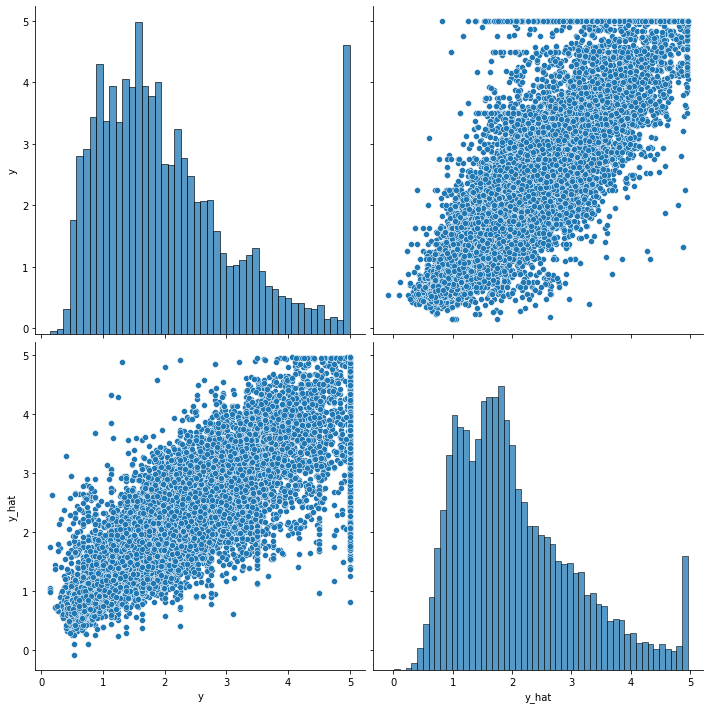

In [31]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=['y', 'y_hat'])
sns.pairplot(df, height=5)
plt.show()